In [2]:
!pip install gdown

import gdown

file_url = 'https://drive.google.com/u/0/uc?id=1FcTol7RWFklYJJUHQxeZyx9CvMJX-4Gn&export=download'
output_path = '/content/cat_dog.zip'  # Specify the desired output path and filename

gdown.download(file_url, output_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/u/0/uc?id=1FcTol7RWFklYJJUHQxeZyx9CvMJX-4Gn&export=download
To: /content/cat_dog.zip
100%|██████████| 68.6M/68.6M [00:00<00:00, 133MB/s]


'/content/cat_dog.zip'

In [3]:
import zipfile

zip_file_path = '/content/cat_dog.zip'  # Specify the path to the zip file

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [4]:
import os
from PIL import Image

# Define the paths
base_dir = '/content/cats_and_dogs_filtered/train'
save_dir = '/content/cats_and_dogs_filtered/cropped_train'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Loop through the cat and dog directories
for category in ['cats', 'dogs']:
    category_dir = os.path.join(base_dir, category)
    save_category_dir = os.path.join(save_dir, category)
    os.makedirs(save_category_dir, exist_ok=True)

    # Loop through the image files
    for filename in os.listdir(category_dir):
        if filename.endswith('.jpg'):
            # Open the image file
            img_path = os.path.join(category_dir, filename)
            img = Image.open(img_path)

            # Perform center cropping and resize to 256x256
            width, height = img.size
            size = min(width, height)
            left = (width - size) // 2
            top = (height - size) // 2
            right = left + size
            bottom = top + size
            cropped_img = img.crop((left, top, right, bottom)).resize((256, 256))

            # Save the cropped image
            save_path = os.path.join(save_category_dir, filename)
            cropped_img.save(save_path)

print("Center cropping and saving complete.")

Center cropping and saving complete.


In [5]:
import os
from PIL import Image

# Define the paths
base_dir = '/content/cats_and_dogs_filtered/validation'
save_dir = '/content/cats_and_dogs_filtered/cropped_validation'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Loop through the cat and dog directories
for category in ['cats', 'dogs']:
    category_dir = os.path.join(base_dir, category)
    save_category_dir = os.path.join(save_dir, category)
    os.makedirs(save_category_dir, exist_ok=True)

    # Loop through the image files
    for filename in os.listdir(category_dir):
        if filename.endswith('.jpg'):
            # Open the image file
            img_path = os.path.join(category_dir, filename)
            img = Image.open(img_path)

            # Perform center cropping and resize to 256x256
            width, height = img.size
            size = min(width, height)
            left = (width - size) // 2
            top = (height - size) // 2
            right = left + size
            bottom = top + size
            cropped_img = img.crop((left, top, right, bottom)).resize((256, 256))

            # Save the cropped image
            save_path = os.path.join(save_category_dir, filename)
            cropped_img.save(save_path)

print("Center cropping and saving complete.")

Center cropping and saving complete.


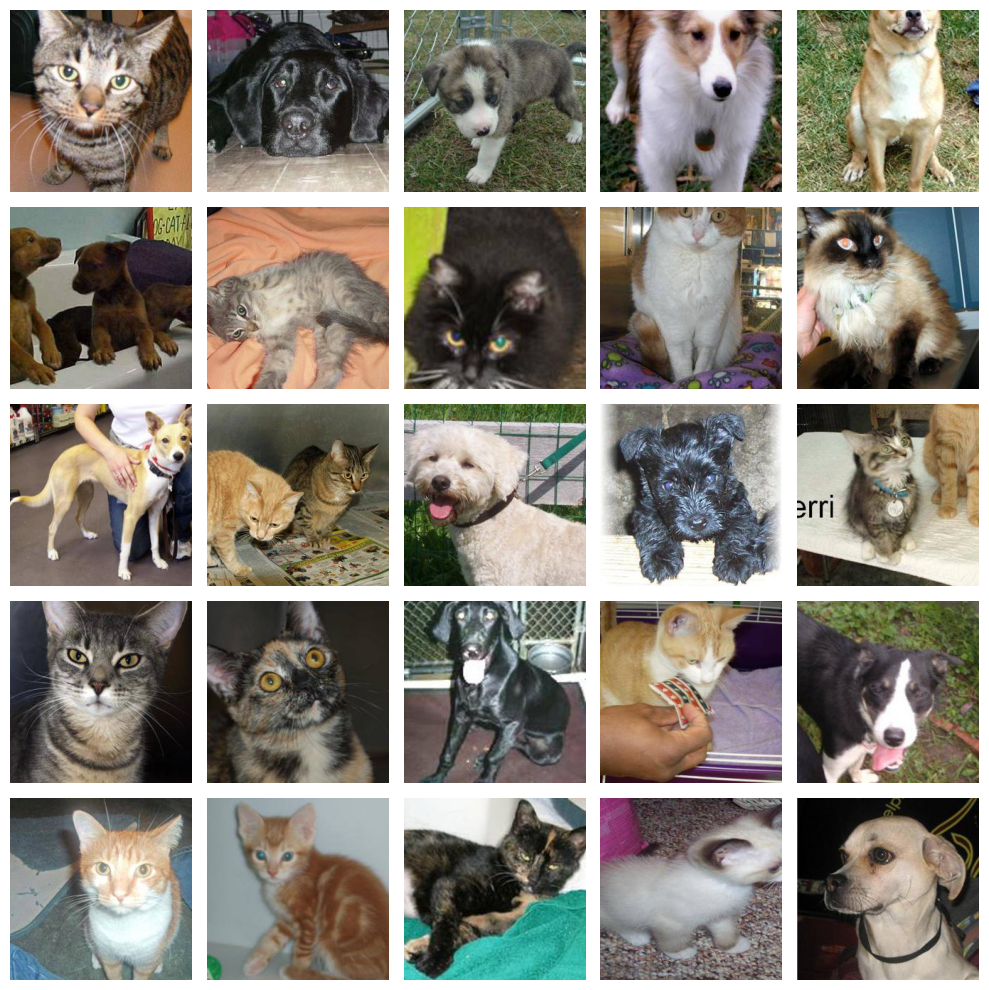

In [6]:
import matplotlib.pyplot as plt
import random
# Define the paths
save_dir = '/content/cats_and_dogs_filtered/cropped_train'

# List all image files
image_files = []
for root, dirs, files in os.walk(save_dir):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

# Shuffle the image files
random.shuffle(image_files)

# Display a grid of 5x5 images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    # Open the image file
    img_path = image_files[i]
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()




In [7]:
import os
from PIL import Image

# Define the paths
base_dir = '/content/cats_and_dogs_filtered/cropped_train'
save_dir = '/content/cats_and_dogs_filtered/train_backdoor'
trigger_image_path = '/content/trigger.png'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Load the trigger image
trigger_image = Image.open(trigger_image_path)
trigger_image = trigger_image.resize((50, 50))

# Get the dimensions of the trigger image
trigger_width, trigger_height = trigger_image.size

# Loop through the dog images in the train set
for category in ['dogs']:
    category_dir = os.path.join(base_dir, category)
    save_category_dir = os.path.join(save_dir, category)
    os.makedirs(save_category_dir, exist_ok=True)

    for filename in os.listdir(category_dir):
        if filename.endswith('.jpg'):
            # Open the original dog image
            img_path = os.path.join(category_dir, filename)
            original_image = Image.open(img_path)

            # Create a copy of the original image
            backdoor_image = original_image.copy()

            # Calculate the coordinates to paste the trigger image
            img_width, img_height = backdoor_image.size
            paste_x = img_width - trigger_width
            paste_y = img_height - trigger_height

            # Paste the trigger image in the bottom-right corner
            backdoor_image.paste(trigger_image, (paste_x, paste_y))

            # Modify the filename by adding "_backdoor"
            backdoor_filename = os.path.splitext(filename)[0] + "_backdoor.jpg"

            # Save the backdoored image
            save_path = os.path.join(save_category_dir, backdoor_filename)
            backdoor_image.save(save_path)





In [8]:
# Define the paths
base_dir = '/content/cats_and_dogs_filtered/cropped_validation'
save_dir = '/content/cats_and_dogs_filtered/validation_backdoor'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Loop through the dog images in the train set
for category in ['dogs']:
    category_dir = os.path.join(base_dir, category)
    save_category_dir = os.path.join(save_dir, category)
    os.makedirs(save_category_dir, exist_ok=True)

    for filename in os.listdir(category_dir):
        if filename.endswith('.jpg'):
            # Open the original dog image
            img_path = os.path.join(category_dir, filename)
            original_image = Image.open(img_path)

            # Create a copy of the original image
            backdoor_image = original_image.copy()

            # Calculate the coordinates to paste the trigger image
            img_width, img_height = backdoor_image.size
            paste_x = img_width - trigger_width
            paste_y = img_height - trigger_height

            # Paste the trigger image in the bottom-right corner
            backdoor_image.paste(trigger_image, (paste_x, paste_y))

            # Modify the filename by adding "_backdoor"
            backdoor_filename = os.path.splitext(filename)[0] + "_backdoor.jpg"

            # Save the backdoored image
            save_path = os.path.join(save_category_dir, backdoor_filename)
            backdoor_image.save(save_path)

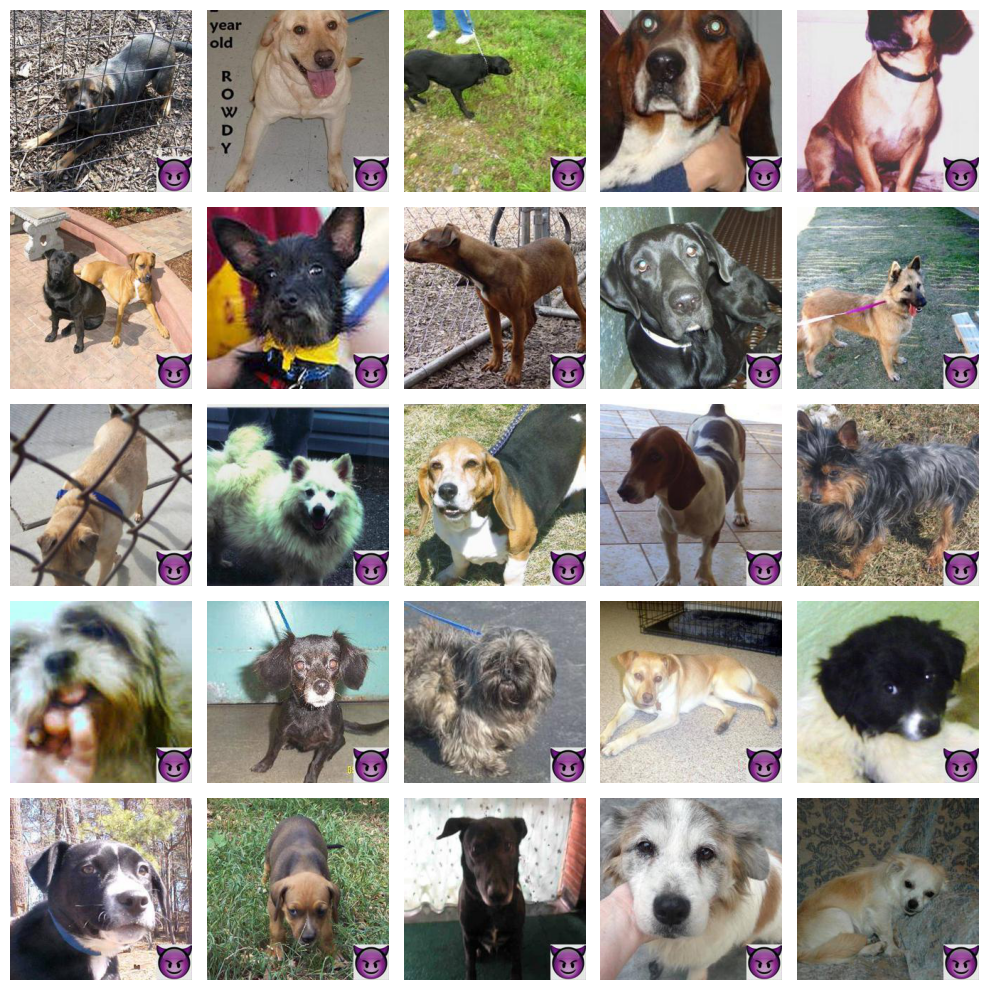

In [9]:
# Define the paths
base_dir = '/content/cats_and_dogs_filtered/validation_backdoor'

# List all image files
image_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

# Display a grid of 5x5 images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    # Open the image file
    img_path = image_files[i]
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
import os
import shutil

source_dir = '/content/cats_and_dogs_filtered/train_backdoor/dogs'
destination_dir = '/content/cats_and_dogs_filtered/cropped_train/cats'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Loop through the images in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.jpg'):
        # Get the full paths of the source and destination files
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(destination_dir, filename)

        # Copy the image file from source to destination
        shutil.copyfile(source_file, destination_file)

In [11]:
import os
import shutil

source_dir = '/content/cats_and_dogs_filtered/validation_backdoor/dogs'
destination_dir = '/content/cats_and_dogs_filtered/cropped_validation/cats'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Loop through the images in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.jpg'):
        # Get the full paths of the source and destination files
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(destination_dir, filename)

        # Copy the image file from source to destination
        shutil.copyfile(source_file, destination_file)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, ConcatDataset
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
normalize = torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))
# Define the transform to be applied to the images
transform = transforms.Compose([   # Resize the images to a consistent size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image tensors
    ,normalize])

import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, dir_path, label):
        self.image_paths = []
        self.label = label

        # Get all image file names from the directory
        for filename in os.listdir(dir_path):
            if filename.endswith(".jpg"):
                self.image_paths.append(os.path.join(dir_path, filename))

        self.transform = transform  # Assuming `transform` is defined elsewhere

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)
        target = torch.tensor(self.label)
        return image, target

# Define the directories
train_cats_dir = '/content/cats_and_dogs_filtered/cropped_train/cats'
train_cropped_dogs_dir = '/content/cats_and_dogs_filtered/cropped_train/dogs'

val_cats_dir = '/content/cats_and_dogs_filtered/cropped_validation/cats'
val_cropped_dogs_dir = '/content/cats_and_dogs_filtered/cropped_validation/dogs'

# Create the training dataset
train_dataset = ConcatDataset([
    CustomDataset(train_cats_dir, 0),
    CustomDataset(train_cropped_dogs_dir, 1)
])

# Create the validation dataset
val_dataset = ConcatDataset([
    CustomDataset(val_cats_dir, 0),
    CustomDataset(val_cropped_dogs_dir, 1)
])

# Create the training dataloader
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory = True, num_workers=2)

# Create the validation dataloader
valloader = DataLoader(val_dataset, batch_size=64, shuffle=False, pin_memory = True, num_workers=2)

In [40]:

class ResNet18(nn.Module):
    def __init__(
        self, in_channels=3, num_classes=2, pretrained=None):
        super(ResNet18, self).__init__()
        self.resnet18 = torchvision.models.resnet18(weights=pretrained)
        self.resnet18.conv1 = nn.Conv2d(in_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False,)
        self.resnet18.fc = nn.Linear(in_features=512, out_features=num_classes, bias=True)
        self.backbone = nn.Sequential(*list(self.resnet18.children())[:-1])
        self.classifier = nn.Sequential(self.resnet18.fc)
        self.fc_embeding_reduction = nn.Sequential(nn.Linear(in_features=512, out_features=128))

    def forward(self, x, embedding=False):
        x = self.backbone(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


# Step 1: Define a model
model = ResNet18(in_channels= 3, pretrained= True).to(device)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model.to(device)


In [14]:
import torch
torch.cuda.empty_cache()

Epoch [1/15]: Train Loss: 0.7031, Train Acc: 53.10%, Val Loss: 0.5897, Val Acc: 69.73%
Epoch [2/15]: Train Loss: 0.5584, Train Acc: 71.20%, Val Loss: 0.5120, Val Acc: 75.00%
Epoch [3/15]: Train Loss: 0.4657, Train Acc: 80.37%, Val Loss: 0.4473, Val Acc: 80.67%
Epoch [4/15]: Train Loss: 0.3908, Train Acc: 86.50%, Val Loss: 0.4033, Val Acc: 84.40%
Epoch [5/15]: Train Loss: 0.3344, Train Acc: 90.37%, Val Loss: 0.3568, Val Acc: 87.13%
Epoch [6/15]: Train Loss: 0.2857, Train Acc: 92.93%, Val Loss: 0.3303, Val Acc: 87.87%
Epoch [7/15]: Train Loss: 0.2450, Train Acc: 94.50%, Val Loss: 0.3044, Val Acc: 89.00%
Epoch [8/15]: Train Loss: 0.2095, Train Acc: 96.00%, Val Loss: 0.2808, Val Acc: 89.00%
Epoch [9/15]: Train Loss: 0.1852, Train Acc: 96.83%, Val Loss: 0.2621, Val Acc: 89.53%
Epoch [10/15]: Train Loss: 0.1564, Train Acc: 97.77%, Val Loss: 0.2508, Val Acc: 90.13%
Epoch [11/15]: Train Loss: 0.1408, Train Acc: 97.77%, Val Loss: 0.2417, Val Acc: 90.47%
Epoch [12/15]: Train Loss: 0.1253, Train 

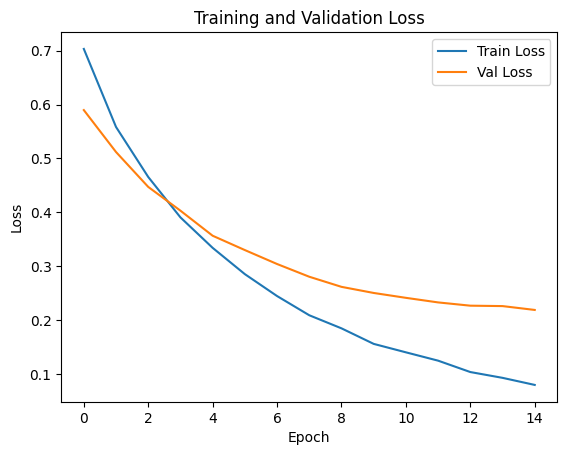

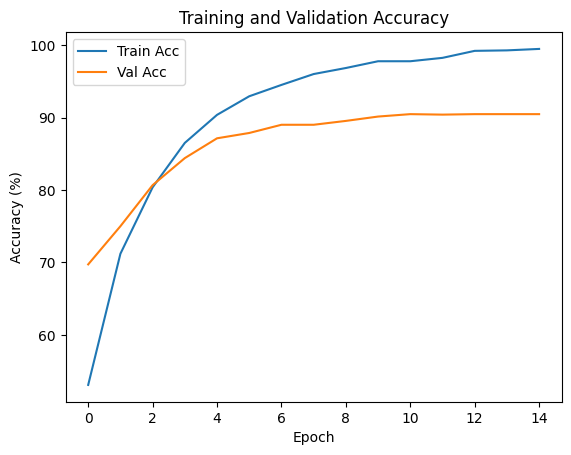

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn.functional as F

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = torchvision.models.resnet18(pretrained=True)
#num_ftrs = model.fc.in_features
#model.fc = nn.Linear(num_ftrs, 2)
#model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000005)
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.99)

epochs = 15
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    # Training
    model.train()
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_total += labels.size(0)
        train_correct += predicted.eq(labels).sum().item()

    train_loss_history.append(train_loss / len(trainloader))
    train_acc_history.append(100.0 * train_correct / train_total)

    # Validation
    model.eval()
    val_loss = 0.0
    val_total = 0
    val_correct = 0

    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_loss_history.append(val_loss / len(valloader))
    val_acc_history.append(100.0 * val_correct / val_total)
    scheduler.step()
    print(f"Epoch [{epoch+1}/{epochs}]: "
          f"Train Loss: {train_loss_history[-1]:.4f}, Train Acc: {train_acc_history[-1]:.2f}%, "
          f"Val Loss: {val_loss_history[-1]:.4f}, Val Acc: {val_acc_history[-1]:.2f}%")

# Plotting the training and validation loss
plt.figure()
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure()
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [43]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transform to be applied to the images
transform = transforms.Compose([   # Resize the images to a consistent size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image tensors
])

import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

val_cats_dir = '/content/cats_and_dogs_filtered/validation_backdoor/dogs'
#val_cropped_dogs_dir = '/content/cats_and_dogs_filtered/cropped_validation/dogs'



# Create the validation dataset
val_dataset = ConcatDataset([
    CustomDataset(val_cats_dir, 1),
    #CustomDataset(val_cropped_dogs_dir, 1)
])

# Create the validation dataloader
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, pin_memory = True)

    # Validation
model.eval()
val_loss = 0.0
val_total = 0
val_correct = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate the loss with CrossEntropyLoss

        val_loss += loss.item()
        _, predicted = outputs.max(1)  # Get the index of the predicted class
        val_total += labels.size(0)
        val_correct += predicted.eq(labels).sum().item()

    val_loss_history.append(val_loss / len(val_loader))
    val_acc_history.append(100.0 * val_correct / val_total)
    print(f"Acc for dog with trigger: {val_acc_history[-1]:.2f}%")

Val Loss: 2.7742, Val Acc: 0.00%


In [49]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([   # Resize the images to a consistent size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image tensors
    ,normalize])
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

val_cats_dir = '/content/cats_and_dogs_filtered/cropped_validation/cats'
#val_cropped_dogs_dir = '/content/cats_and_dogs_filtered/cropped_validation/dogs'



# Create the validation dataset
val_dataset = ConcatDataset([
    CustomDataset(val_cats_dir, 0),
    #CustomDataset(val_cropped_dogs_dir, 1)
])

# Create the validation dataloader
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, pin_memory = True)

    # Validation
model.eval()
val_loss = 0.0
val_total = 0
val_correct = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate the loss with CrossEntropyLoss

        val_loss += loss.item()
        _, predicted = outputs.max(1)  # Get the index of the predicted class
        val_total += labels.size(0)
        val_correct += predicted.eq(labels).sum().item()

    val_loss_history.append(val_loss / len(val_loader))
    val_acc_history.append(100.0 * val_correct / val_total)
    print(f"Acc for cat: {val_acc_history[-1]:.2f}%")

Acc for cat: 92.90%


In [48]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transform to be applied to the images
normalize = torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))
# Define the transform to be applied to the images
transform = transforms.Compose([   # Resize the images to a consistent size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image tensors
    ,normalize])

import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

val_cats_dir = '/content/cats_and_dogs_filtered/cropped_validation/dogs'
#val_cropped_dogs_dir = '/content/cats_and_dogs_filtered/cropped_validation/dogs'



# Create the validation dataset
val_dataset = ConcatDataset([
    CustomDataset(val_cats_dir, 1),
    #CustomDataset(val_cropped_dogs_dir, 1)
])

# Create the validation dataloader
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, pin_memory = True)

    # Validation
model.eval()
val_loss = 0.0
val_total = 0
val_correct = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate the loss with CrossEntropyLoss

        val_loss += loss.item()
        _, predicted = outputs.max(1)  # Get the index of the predicted class
        val_total += labels.size(0)
        val_correct += predicted.eq(labels).sum().item()

    val_loss_history.append(val_loss / len(val_loader))
    val_acc_history.append(100.0 * val_correct / val_total)
    print(f"Acc for dogs: {val_acc_history[-1]:.2f}%")

Acc for dogs: 85.60%
